**B4**

Коцевич Андрей, Б02-920

Теоретическая задача 3 решена в отдельном файле.

In [6]:
import numpy as np
import scipy.linalg as scl
from matplotlib import pyplot as plt 

**1.** Напишите программу, реализующую приближённое решение системы линейных алгебраических уравнений итерационным методом Якоби. С её помощью найдите решение системы уравнений следующего вида: $Ax=f$
$$a_{ii}=2,\quad a_{i,i+1}=-1-α,\quad a_{i,i-1}=-1+α$$
$$f_1=1-α,\quad f_i=0,\quad i=2,3,...,n-1,\quad f_n=1+α$$
Какое у этой системы точное решение?  С какой скоростью метод сходится в зависимости от $n$ и $α$?

In [14]:
def jacobi(A, f, e): #метод Якоби 
  x = np.matrix(np.zeros((A.shape[0],1)))
  D = np.diagflat(np.diag(A))
  R = A - D
  r = A*x-f #невязка
  iter = 0 #число итераций
  while (scl.norm(r,2)>e) & (scl.norm(r,2)<1e3):
    x=scl.inv(D)*(f-R*x)
    r=A*x-f
    iter += 1
  return x, iter

In [15]:
def init(n, alpha): #инициализация матрицы A и столбца f
  A = np.zeros([n, n])
  for i in range(n):
    A[i, i] = 2
    if i != n - 1:
      A[i, i + 1] = -1 - alpha
    if i != 0:
      A[i, i - 1] = -1 + alpha
  f = np.zeros(n)
  f[0] = 1 - alpha
  f[n - 1] = 1 + alpha
  return A, f.reshape(-1,1)
A, f = init(5, 0.1)
jacobi(A, f, 0.01)

(matrix([[0.99054045],
         [0.9872296 ],
         [0.98452073],
         [0.98955149],
         [0.99366757]]), 30)

Точное решение этой системы -- единичный вектор.

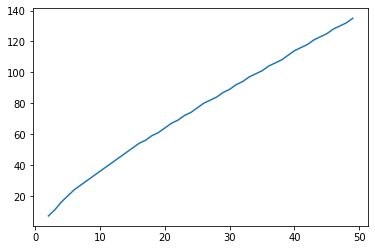

In [8]:
#зависимость числа итераций от n
iters = []
N = 50
for i in range(2, N):
  A, f = init(i, 0.5)
  x,iter=jacobi(A, f, 0.01)
  iters.append(iter)
plt.plot(np.array(range(2, N)), iters)

Чем больше матрица, тем медленнее сходится. Похоже на линейный рост $O(N)$.

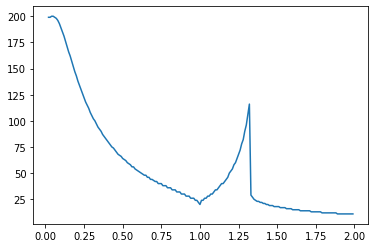

In [ ]:
#зависимость числа итераций от alpha
iters = []
N = 200
for i in range(2, N):
  A, f = init(20, 0.01*i)
  x,iter=jacobi(A, f, 0.01)
  iters.append(iter)
plt.plot(np.array(range(2, N))*0.01, iters)

In [ ]:
При $\alpha=1.25$ происходит скачок в числе итераций.

**2.** Напишите программу, реализующую приближённое решение системы линейных
алгебраических уравнений итерационным методом Зейделя. С её помощью найдите
решение системы уравнений из предыдущей задачи. Сравните между собой скорости
сходимости итерационных методов Якоби и Зейделя.

In [91]:
def zeidel(A, f, e): #метод Зейделя 
  x = np.matrix(np.zeros((A.shape[0],1)))
  D = np.diag(np.diag(A))
  L = np.tril(A) - D
  U = np.triu(A) - D
  r = A*x-f #невязка
  iter = 0
  while (scl.norm(r,2)>e) & (scl.norm(r,2)<1e3):
    x=-np.linalg.inv(L+D)@U*x+np.linalg.inv(L+D)@f
    r=A*x-f
    iter += 1
  return x, iter

In [92]:
A, f = init(5, 0.1)
zeidel(A, f, 0.01)

(matrix([[0.98928281],
         [0.98553179],
         [0.98697861],
         [0.99121056],
         [0.99604475]]), 16)

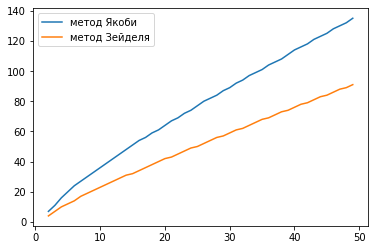

In [224]:
#зависимость от n методов Якоби и Зейделя на одном графике
iters1 = []
iters2 = []
N = 50
for i in range(2, N):
    A, f = init(i, 0.5)
    x, iter = jacobi(A, f, 0.01)
    iters1.append(iter)
    x, iter = zeidel(A, f, 0.01)
    iters2.append(iter)
plt.plot(np.array(range(2, N)), iters1, label='метод Якоби')
plt.plot(np.array(range(2, N)), iters2, label='метод Зейделя')
plt.legend()

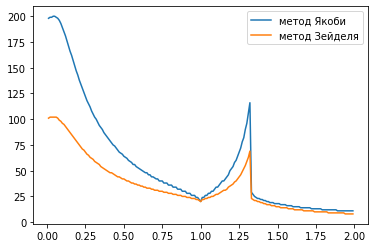

In [159]:
#зависимость от alpha методов Якоби и Зейделя на одном графике
iters1 = []
iters2 = []
N = 200
for i in range(1, N):
    A, f = init(20, 0.01*i)
    x, n_iter = jacobi(A, f, 0.01)
    iters1.append(n_iter)
    x, n_iter = zeidel(A, f, 0.01)
    iters2.append(n_iter)
plt.plot(np.array(range(1, N))*0.01, iters1, label='метод Якоби')
plt.plot(np.array(range(1, N))*0.01, iters2, label='метод Зейделя')
plt.legend()

Как видно, метод Зейделя сходится быстрее.

**4.** Напишите программу, реализующую приближённое решение системы линейных алгебраических уравнений методом релаксации (обобщение методов Гаусса и Зейделя)$$(D+L)\frac{x_{k+1}-x_k}{\tau_{k+1}}+Ax_k=f,\quad k=1,2,...$$
Исследуйте зависимость скорости сходимости этого итерационного метода от итерационного параметра $\tau_{k+1}=\tau$ при численном решении системы уравнений из первой задачи в зависимости от параметров $n$ и $α$. 

In [102]:
def relaxation(A, f, tau, e): #метод релаксации
    D = np.diag(np.diag(A))
    L = np.tril(A) - D
    U = np.triu(A) - D
    x = np.zeros(shape=(A.shape[1], 1))
    r=A@x-f
    iter = 0
    while (scl.norm(r,2)>e) & (scl.norm(r,2)<1e3):
        x = x-tau*np.linalg.inv(D+L)@A@x+tau*np.linalg.inv(D+L)@f
        r = A@x-f
        iter += 1
    return x, iter

In [114]:
A, f = init(5, 0.1)
relaxation(A, f, 1, 0.01)

(array([[0.98928281],
        [0.98553179],
        [0.98697861],
        [0.99121056],
        [0.99604475]]), 16)

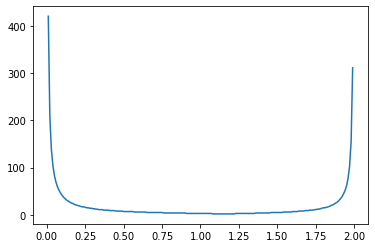

In [200]:
#зависимость от tau при n=2, alpha = 0.01
iters = []
N = 200
for i in range(1, N):
  A, f = init(2, 0.01)
  x,iter=relaxation(A, f, i*0.01, 0.1)
  iters.append(iter)
plt.plot(np.array(range(1, N))*0.01, iters)

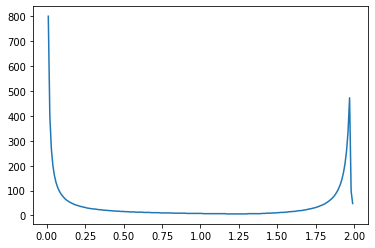

In [202]:
#зависимость от tau при n=5, alpha = 0.01
iters = []
N = 200
for i in range(1, N):
  A, f = init(5, 0.01)
  x,iter=relaxation(A, f, i*0.01, 0.1)
  iters.append(iter)
plt.plot(np.array(range(1, N))*0.01, iters)

Начиная с $n=5$, при $\alpha=0.01$ локальный максимум вблизи $\tau=2$ начинает смещаться.

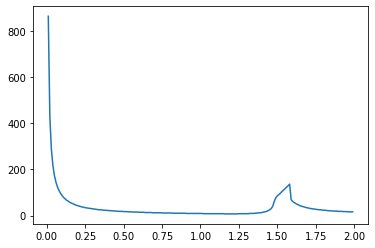

In [203]:
#зависимость от tau при n=50, alpha = 0.01
iters = []
N = 200
for i in range(1, N):
  A, f = init(50, 0.01)
  x,iter=relaxation(A, f, i*0.01, 0.1)
  iters.append(iter)
plt.plot(np.array(range(1, N))*0.01, iters)

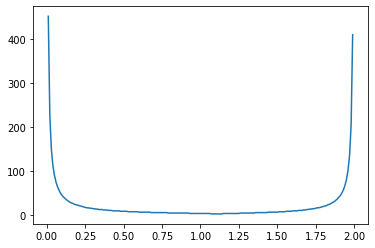

In [222]:
#зависимость от tau при n=2, alpha = 0.5
iters = []
N = 200
for i in range(1, N):
  A, f = init(2, 0.5)
  x,iter=relaxation(A, f, i*0.01, 0.1)
  iters.append(iter)
plt.plot(np.array(range(1, N))*0.01, iters)

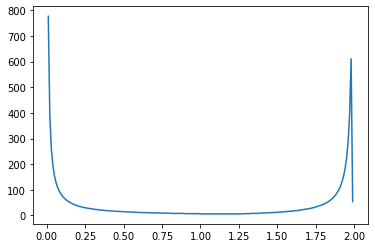

In [214]:
#зависимость от tau при n=4, alpha = 0.5
iters = []
N = 200
for i in range(1, N):
  A, f = init(4, 0.5)
  x,iter=relaxation(A, f, i*0.01, 0.1)
  iters.append(iter)
plt.plot(np.array(range(1, N))*0.01, iters)

Начиная с $n=4$, при $\alpha=0.5$ локальный максимум вблизи $\tau=2$ начинает смещаться.

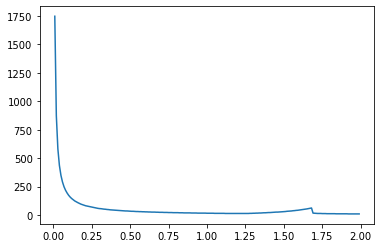

In [218]:
#зависимость от tau при n=10, alpha = 0.5
iters = []
N = 200
for i in range(1, N):
  A, f = init(10, 0.5)
  x,iter=relaxation(A, f, i*0.01, 0.1)
  iters.append(iter)
plt.plot(np.array(range(1, N))*0.01, iters)

**5.** Напишите программу, реализующую приближённое решение системы линейных алгебраических уравнений методом верхней релаксации:
$$(D+\tau L)\frac{x_{k+1}-x_k}{\tau}+Ax_k=f,\quad k=1,2,...$$
Исследуйте зависимость скорости сходимости этого итерационного метода от итерационного параметра $\tau$ при численном решении системы уравнений из первой задачи в зависимости от параметров $n$ и $\alpha$. 

In [98]:
def upper_relaxation(A, f, tau, e): #метод верхней релаксации
    D = np.diag(np.diag(A))
    L = np.tril(A) - D
    U = np.triu(A) - D
    x = np.zeros(shape=(A.shape[1], 1))
    r=A@x-f
    iter = 0
    while (scl.norm(r,2)>e) & (scl.norm(r,2)<1e3):
        x = x-tau*np.linalg.inv(D+tau*L)@A@x+tau*np.linalg.inv(D+tau*L)@f
        r = A@x-f
        iter += 1
    return x, iter

In [113]:
A, f = init(5, 0.1)
upper_relaxation(A, f, 1, 0.01)

(array([[0.98928281],
        [0.98553179],
        [0.98697861],
        [0.99121056],
        [0.99604475]]), 16)

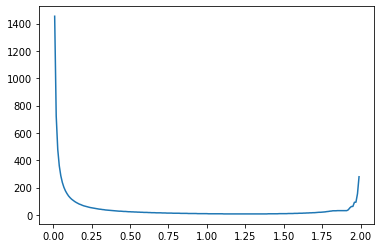

In [149]:
#зависимость от tau при n=30, alpha = 0.01
iters = []
N = 200
for i in range(1, N):
  A, f = init(30, 0.01)
  x,iter=upper_relaxation(A, f, i*0.01, 0.1)
  iters.append(iter)
plt.plot(np.array(range(1, N))*0.01, iters)

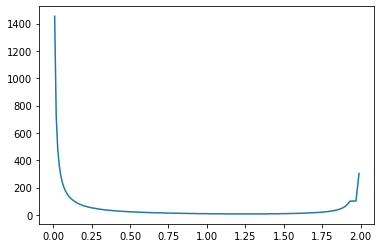

In [153]:
#зависимость от tau при n=100, alpha = 0.01
iters = []
N = 200
for i in range(1, N):
  A, f = init(100, 0.01)
  x,iter=upper_relaxation(A, f, i*0.01, 0.1)
  iters.append(iter)
plt.plot(np.array(range(1, N))*0.01, iters)

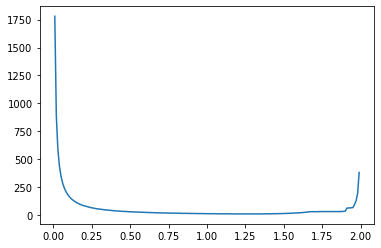

In [116]:
#зависимость от tau при n=30, alpha = 0.1
iters = []
N = 200
for i in range(1, N):
  A, f = init(30, 0.1)
  x,iter=upper_relaxation(A, f, i*0.01, 0.1)
  iters.append(iter)
plt.plot(np.array(range(1, N))*0.01, iters)

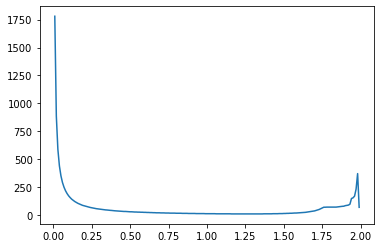

In [138]:
#зависимость от tau при n=70, alpha = 0.1
iters = []
N = 200
for i in range(1, N):
  A, f = init(70, 0.1)
  x,iter=upper_relaxation(A, f, i*0.01, 0.1)
  iters.append(iter)
plt.plot(np.array(range(1, N))*0.01, iters)

Начиная с $n=70$, при $\beta=0.1$ локальный максимум вблизи $\tau=2$ начинает смещаться.

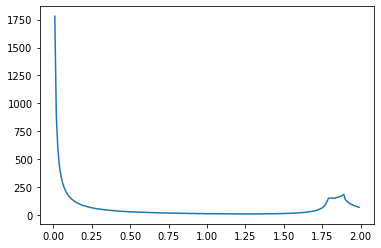

In [148]:
#зависимость от tau при n=200, alpha = 0.1
iters = []
N = 200
for i in range(1, N):
  A, f = init(150, 0.1)
  x,iter=upper_relaxation(A, f, i*0.01, 0.1)
  iters.append(iter)
plt.plot(np.array(range(1, N))*0.01, iters)

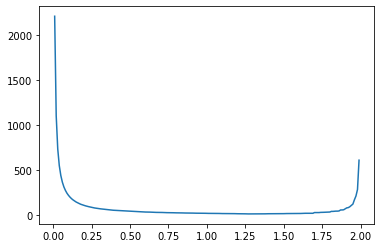

In [177]:
#зависимость от tau при n=10, alpha = 0.5
iters = []
N = 200
for i in range(1, N):
  A, f = init(10, 0.5)
  x,iter=upper_relaxation(A, f, i*0.01, 0.1)
  iters.append(iter)
plt.plot(np.array(range(1, N))*0.01, iters)

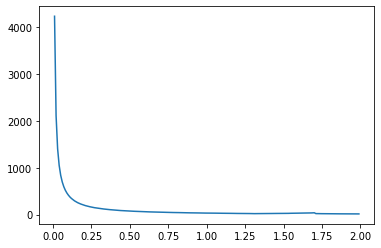

In [180]:
#зависимость от tau при n=20, alpha = 0.5
iters = []
N = 200
for i in range(1, N):
  A, f = init(20, 0.5)
  x,iter=upper_relaxation(A, f, i*0.01, 0.1)
  iters.append(iter)
plt.plot(np.array(range(1, N))*0.01, iters)

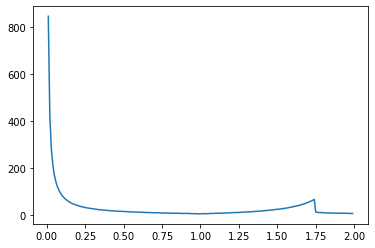

In [182]:
#зависимость от tau при n=5, alpha = 1
iters = []
N = 200
for i in range(1, N):
  A, f = init(5, 1)
  x,iter=upper_relaxation(A, f, i*0.01, 0.1)
  iters.append(iter)
plt.plot(np.array(range(1, N))*0.01, iters)

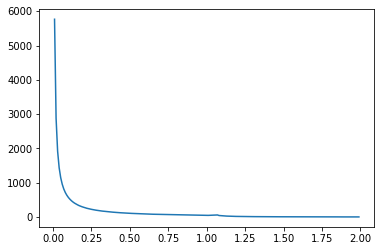

In [183]:
#зависимость от tau при n=70, alpha = 1
iters = []
N = 200
for i in range(1, N):
  A, f = init(50, 1)
  x,iter=upper_relaxation(A, f, i*0.01, 0.1)
  iters.append(iter)
plt.plot(np.array(range(1, N))*0.01, iters)

**6.** Решите систему из задачи 1 с помощью Чебышевского ускорения МПИ.

In [22]:
def jacobi_cheb(A, f, rho, e): #метод Якоби 
  x=np.random.random((A.shape[0],1))
  D=np.diagflat(np.diag(A))
  R=-scl.inv(D)@(A-D)
  k=0
  mu1=1
  mu2=rho
  x1=x 
  x2=R@x+scl.inv(D)@f
  muf=rho
  while (scl.norm(A@x-f,2)>e)&(scl.norm(A@x-f,2)<1e6):
    muf=1/(2/(rho*mu2)-1/(mu1))
    x=2*muf/(rho*mu2) *R @ x2 - (muf/mu1) * R @ x1 + (2*muf)/(rho*mu1)*f
    x1=x2
    mu1=mu2
    x2=x
    mu2=muf
    k+=1
  return x

In [23]:
A, f = init(12, 0.2)
jacobi_cheb(A,f,1.1,0.01)

array([[  76300.29107141],
       [-107967.03428691],
       [  97677.9668198 ],
       [ -53779.47324426],
       [ -10518.94490666],
       [  78855.29577285],
       [-134467.26446338],
       [ 164825.80811408],
       [-164452.37589276],
       [ 136807.09031566],
       [ -91718.83406863],
       [  42341.14638632]])

Почему-то расходится.